<a href="https://colab.research.google.com/github/JayanthiJayakumaran/Flight-Price-Prediction/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FLIGHT FARE PREDICTION USING 10 MACHINE LEARNING MODELS **


In [1]:
#Importing all the necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
#Uploading data from local to google colab
from google.colab import files
uploaded = files.upload()


Saving Clean_Dataset.csv to Clean_Dataset.csv


In [3]:
#Analysing the Dataset
data_cl=pd.read_csv(io.BytesIO(uploaded['Clean_Dataset.csv']))
data_cl

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [4]:
#Dropping the unwanted column and knowing the size of the data
data_cl=data_cl.drop('Unnamed: 0',axis=1)
data_cl.shape

(300153, 11)

In [5]:
#Using groupby to group the dataset based on airline and count of them.
fl_da=data_cl.groupby(['flight','airline'],as_index=False).count()
fl_da.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

Indigo becaming as a most popular Airline.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


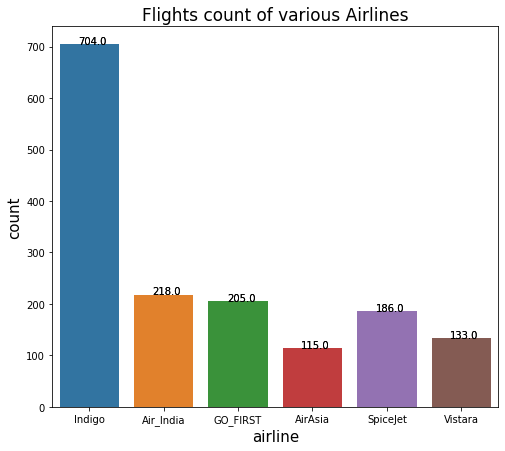

In [6]:
#Flights count of Different Airlines
plt.figure(figsize=(8,7))
sns.countplot(fl_da["airline"],palette="hls")
plt.title("Flights count of various Airlines",fontsize=17)
plt.xlabel("Airline",fontsize=15)
plt.ylabel("Count",fontsize=15)
ct=sns.countplot(x=fl_da["airline"])
for p in ct.patches:
   ct.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

In [7]:
#Grouping based on class
cl_df=data_cl.groupby(['flight','airline','class'],as_index=False).count()
cl_df["class"].value_counts()


Economy     1560
Business     295
Name: class, dtype: int64

Most of the Airlines has Economic class as common class

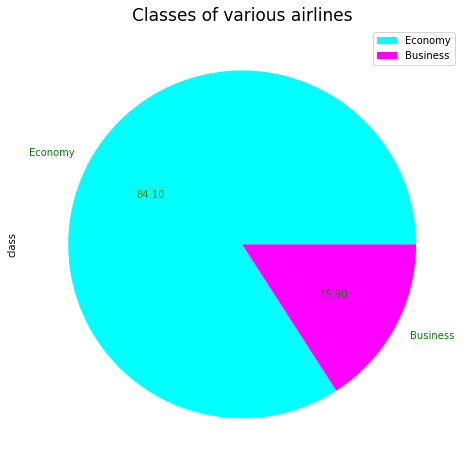

In [8]:
#Pie plot of classes of various airlines
plt.figure(figsize=(10,8))
cl_df["class"].value_counts().plot(kind='pie',textprops={'color':'green'},autopct='%.2f',cmap='cool')
plt.title('Classes of various airlines',fontsize=17)
plt.legend(['Economy','Business'])
plt.show()

Whether price varies with Airlines?
  * As we can see Vistara has Maximum Price range
  * Vistara and Air_India airlines have maximum price when compared to others.
  * Spicejet, AirAsia, Go_First and Indigo has some what more or less equal prices. 







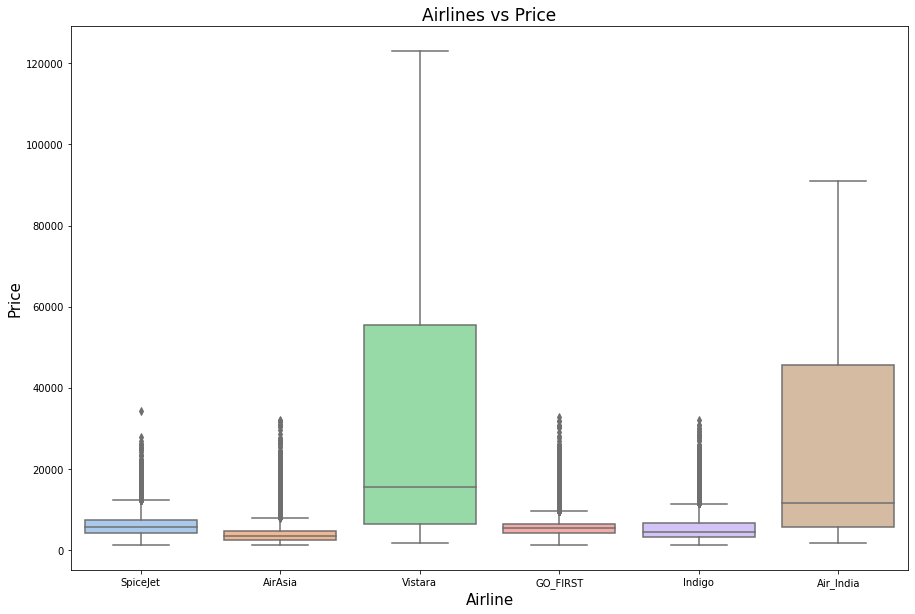

In [9]:
#Boxplot of Airlines vs Price
plt.figure(figsize=(15,10))
sns.boxplot(x=data_cl['airline'],y=data_cl['price'],palette='pastel')
plt.title("Airlines vs Price",fontsize=17)
plt.xlabel("Airline",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

How Does the Ticket Price vary between Economy and Business Class?
  * Ticket Price is maximum for Business class when compared to Economy class.




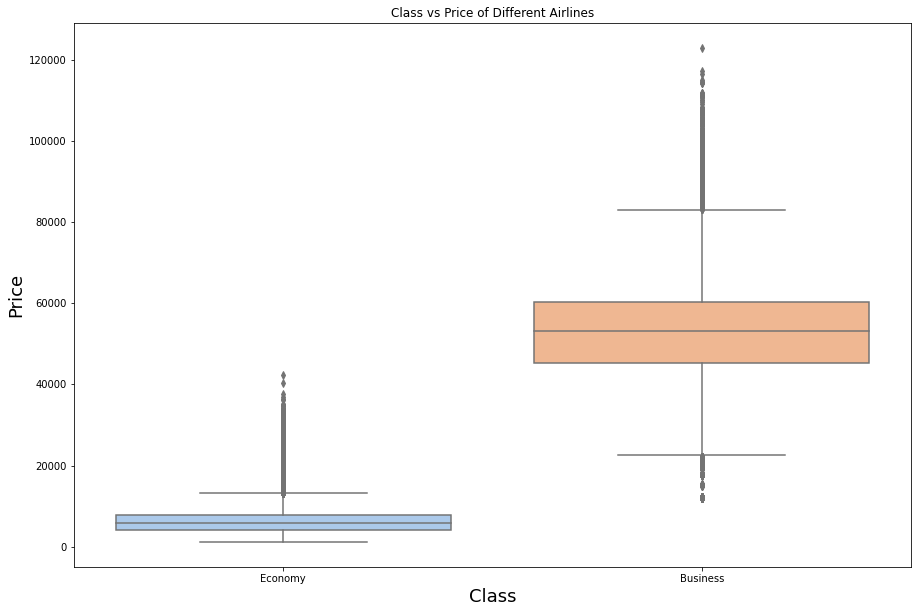

In [10]:
#Box plot of Class vs Price of Different Airlines
plt.figure(figsize=(15,10))
sns.boxplot(x='class',y='price',data=data_cl,palette='pastel')
plt.title("Class vs Price of Different Airlines")
plt.xlabel('Class',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.show()


How does the Ticket price vary with the number of stops of a flight?
  * One stop flights have maximum ticket price.




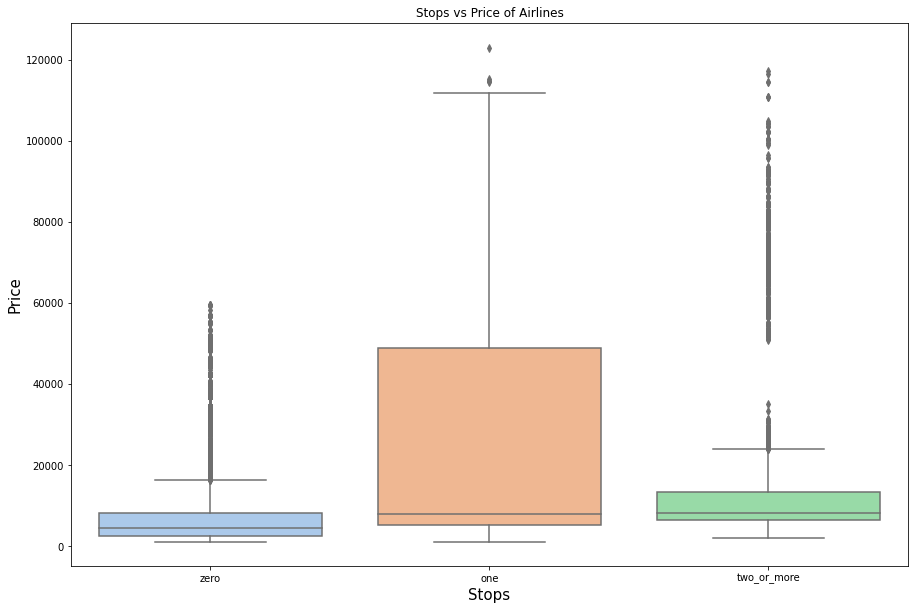

In [11]:
#Box plot of stops vs ticket price.
plt.figure(figsize=(15,10))
sns.boxplot(x="stops",y='price',data=data_cl,palette='pastel')
plt.title("Stops vs Price of Airlines")
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

How the Ticket Price change based on the Departure Time and Arrival Time?
1. Departure Time vs Ticket Price:
    * Ticket price is high for the flights when the Departure Time is at Night.
    * Ticket price is almost equal for flights having Departure time at Early_morning, Morning and Evening.
    * Ticket price is low for the flights having departure time at Late_night.

2. Arrival Time vs Ticket price
    * Ticket price is more for the flights when the Arrival time is at Evening.
    * Ticket price is almost equal for flights 
having arrival time is at Morning and Night.
    * Ticket price is low for the flights having arrival time at Late_night as same as Departure Time.   



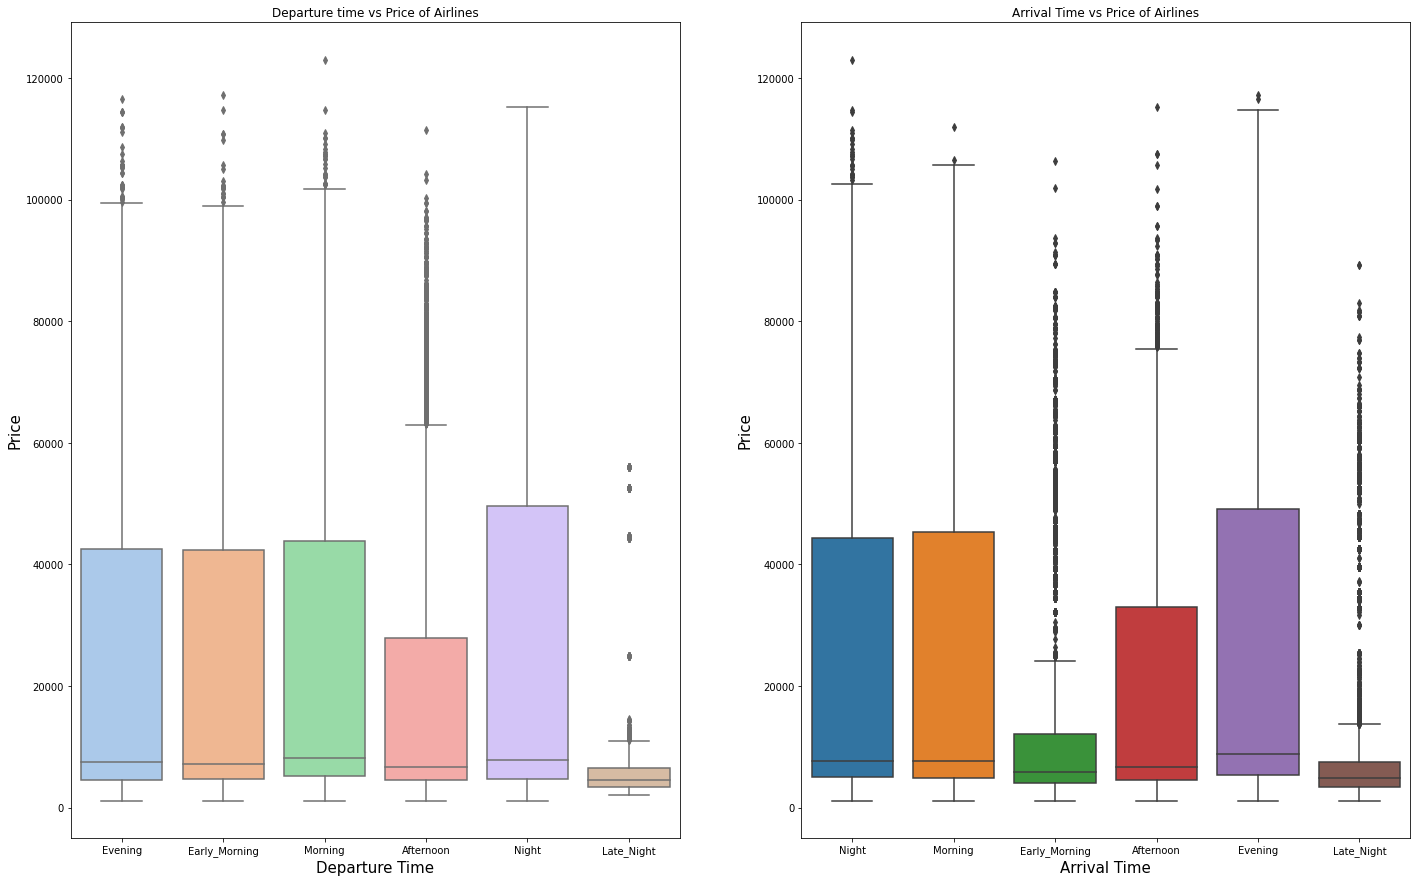

In [12]:
#Box plot of Time vs Airline price
plt.figure(figsize=(24,15))
plt.subplot(1,2,1)
sns.boxplot(x='departure_time',y='price',data=data_cl,palette='pastel')
plt.title("Departure time vs Price of Airlines")
plt.xlabel("Departure Time",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x='arrival_time',y='price',data=data_cl)
plt.title("Arrival Time vs Price of Airlines")
plt.xlabel("Arrival Time",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()


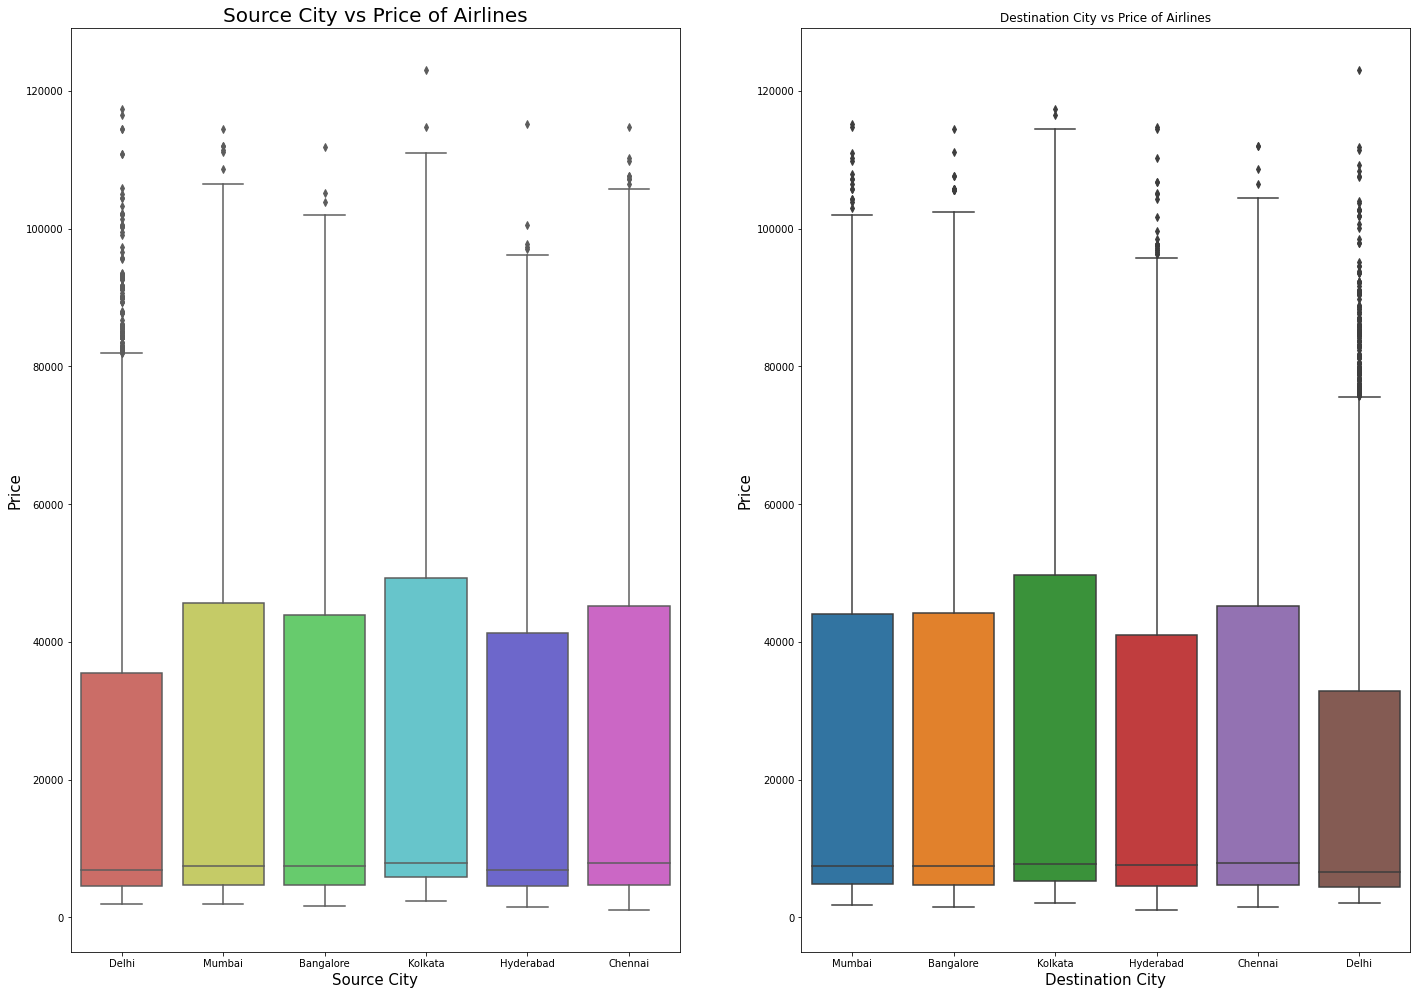

In [13]:
#Box plot of Source City and Destination City vs Airlines
plt.figure(figsize=(24,17))
plt.subplot(1,2,1)
sns.boxplot(x="source_city",y='price',data=data_cl,palette='hls')
plt.title("Source City vs Price of Airlines",fontsize=20)
plt.xlabel("Source City",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(x="destination_city",y="price",data=data_cl)
plt.title("Destination City vs Price of Airlines")
plt.xlabel("Destination City",fontsize=15)
plt.ylabel("Price",fontsize=15)
plt.show()

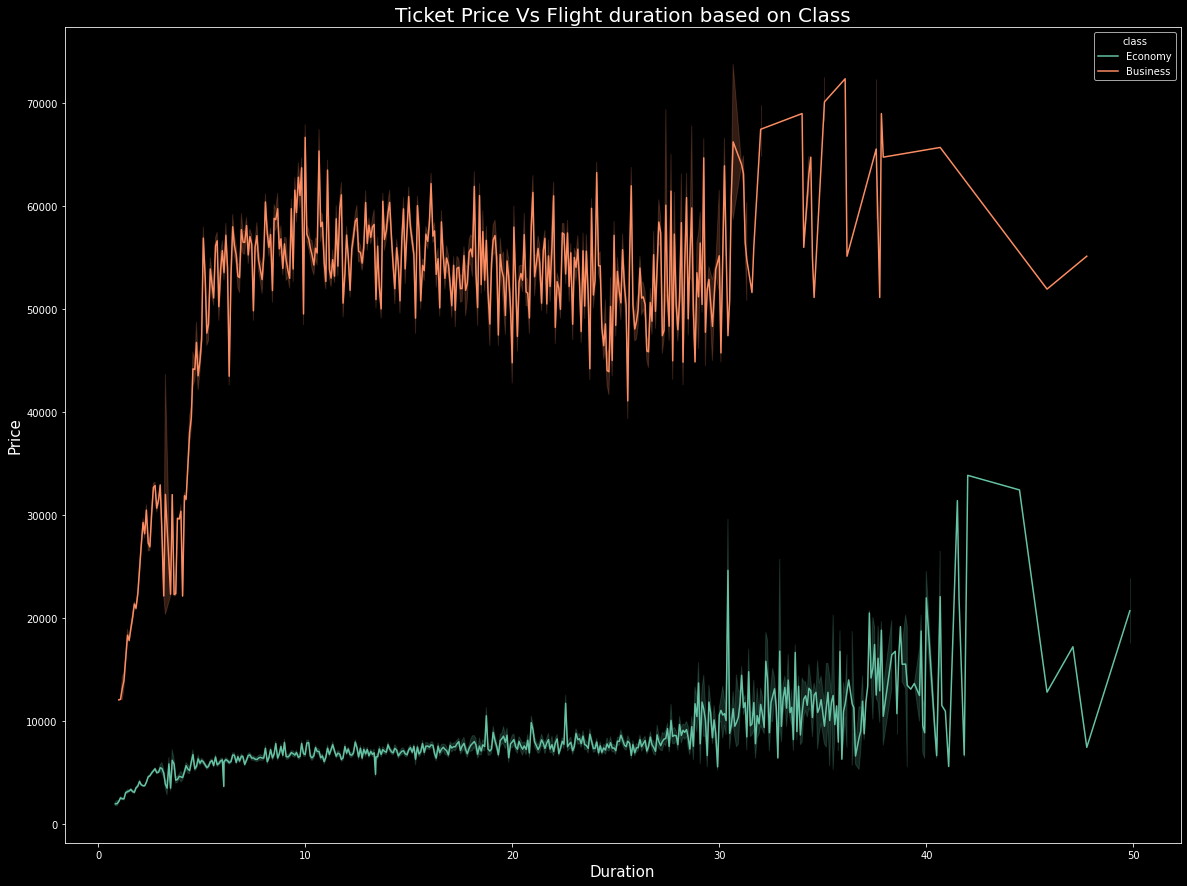

In [14]:
#Line plot with Ticket Price Vs Flight duration based on Class
plt.style.use('dark_background')
plt.figure(figsize=(20,15))
sns.lineplot(data=data_cl,x="duration",y='price',hue='class',palette='Set2')
plt.title('Ticket Price Vs Flight duration based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

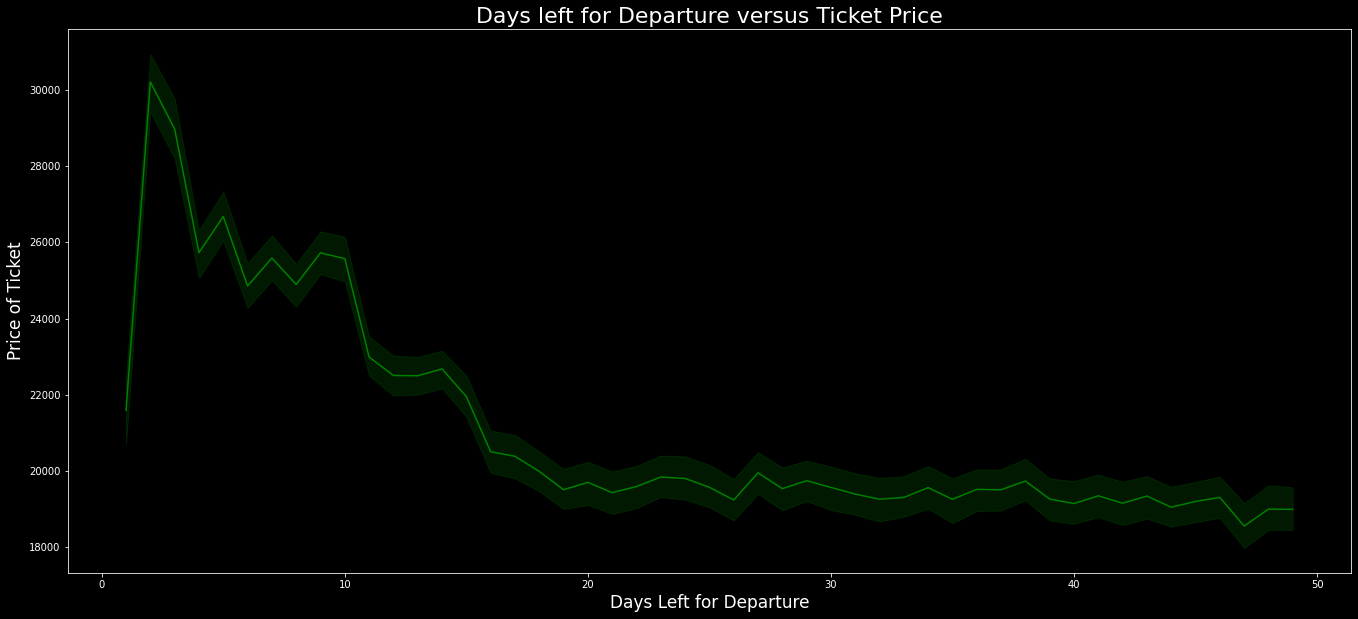

In [15]:
#Line plot of Days left for Departure vs Tick price.
plt.style.use('dark_background')
plt.figure(figsize=(23,10))
sns.lineplot(data=data_cl, x='days_left',y='price',color='green')
plt.title('Days left for Departure versus Ticket Price',fontsize=22)
plt.xlabel("Days Left for Departure",fontsize=17)
plt.ylabel("Price of Ticket",fontsize=17)
plt.show()


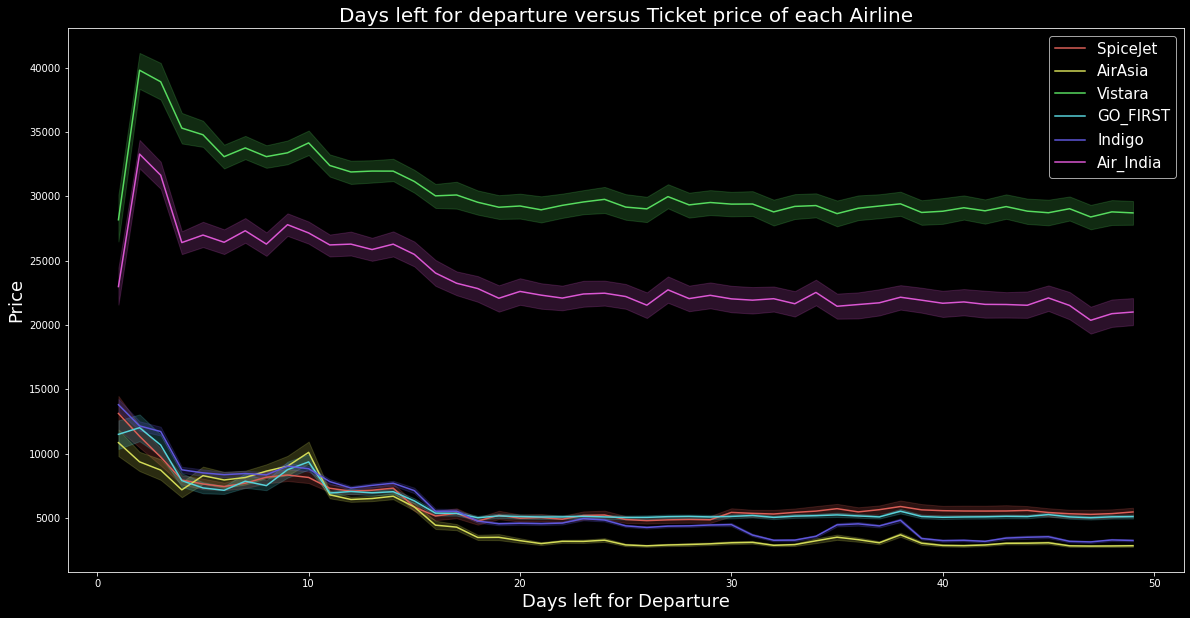

In [16]:
#Line plot of Days left for Departure vs Ticket price of each Airline
plt.style.use('dark_background')
plt.figure(figsize=(20,10))
sns.lineplot(data=data_cl,x='days_left',y='price',color='red',hue='airline',palette='hls')
plt.title("Days left for departure versus Ticket price of each Airline",fontsize=20)
plt.legend(fontsize=15)
plt.xlabel("Days left for Departure", fontsize=18)
plt.ylabel("Price", fontsize=18)
plt.show()

In [17]:
#Total number of Flights from one city to another
data_cl.groupby(['flight','source_city','destination_city','airline','class'],as_index=False).count().groupby(['source_city','destination_city'],as_index=False)['flight'].count().head(15)

,source_city,destination_city,flight
0,Bangalore,Chennai,106
1,Bangalore,Delhi,227
2,Bangalore,Hyderabad,132
3,Bangalore,Kolkata,171
4,Bangalore,Mumbai,175
5,Chennai,Bangalore,69
6,Chennai,Delhi,105
7,Chennai,Hyderabad,82
8,Chennai,Kolkata,110
9,Chennai,Mumbai,94


In [18]:
#Avearge price of different airlines from source city to Destination city 
data_cl.groupby(['airline','source_city','destination_city'],as_index=False)['price'].mean().head(15)

,airline,source_city,destination_city,price
0,AirAsia,Bangalore,Chennai,2073.043478
1,AirAsia,Bangalore,Delhi,4807.092426
2,AirAsia,Bangalore,Hyderabad,2931.494792
3,AirAsia,Bangalore,Kolkata,4443.468160
4,AirAsia,Bangalore,Mumbai,3342.385350
5,AirAsia,Chennai,Bangalore,1914.760870
6,AirAsia,Chennai,Delhi,3697.314003
7,AirAsia,Chennai,Hyderabad,2053.182540
8,AirAsia,Chennai,Kolkata,3682.338762
9,AirAsia,Chennai,Mumbai,2691.100000


In [19]:
#Taking a Backup copy for further processing
data_bk=data_cl.copy()

In [20]:
#Converting the labels into a numberic form using Label Encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in data_cl.columns:
  if data_cl[col].dtype=='object':
    data_cl[col]=le.fit_transform(data_cl[col])
    

In [21]:
#Storing the Dependent Variables in X and Independent variable in Y
x=data_cl.drop(['price'],axis=1)
y=data_cl['price']

In [22]:
#Splitting the Data into Training set and Testing Set.
from scipy.sparse.construct import random
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((210107, 10), (90046, 10), (210107,), (90046,))

In [23]:
#Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)

In [24]:
#Creating a Pandas Dataframe.
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[],'Adj_R_Square':[],'Root_Mean_Squared_Error_RMSE':[],'Mean_Absolute_percentage_Error_MAPE':[],'Mean_Squared_Error_MSE':[],'Root_Mean_Squared_Log_Error_RMSLE':[],'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


In [57]:
#Building the regression models.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
#Define the funtion to calculate the MAPE- Mean Absolute Percentage Error
def MAPE(y_test, y_pred):
    y_test,y_pred=np.array(y_test), np.array(y_pred)
    return np.mean(np.abs((y_test-y_pred)/y_test))*100
#Creating a Dataframe
Results=pd.DataFrame(columns=['Model Name', 'Mean_Absolute_Error_MAE', 'Adj_R_Square', 'Root_Mean_Squared_Error_RMSE',
                               'Mean_Squared_Error_MSE', 'Root_Mean_Squared_Log_Error_RMSLE',
                                'R2_score'])
#Create objects of Regession model with default hyper parameters
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE = Ridge()
modelLO = linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

#Evaluation matrix for all the algorithms
MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR,modelXGR, modelbag, modelRE, modelLO]

for models in MM:
#Fit the models with train data
  models.fit(x_train, y_train)
#Predict the model with test data
  y_pred=models.predict(x_test)
#Displaying the model name and evaluation metrics for Regression ananlysis
  print("Model Name:", models)
  print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test,y_pred),3))
  print("Mean Squared Error (MSE):", round(metrics.mean_squared_error(y_test,y_pred),3))
  print("Root Mean Squared Error (RMSE):", round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),3))
  print("R2_score:",round(metrics.r2_score(y_test,y_pred),6))
  print("Root Mean Squared Log Error (RMSLE):",round(np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),3))
  #Evaluation of MAPE
  result = MAPE(y_test,y_pred)
  print("Mean Absolute Percentage Error(MAPE):",round(result,2),'%')
  #Calculation of Adjusted R squared values
  r_squared=round(metrics.r2_score(y_test,y_pred),6)
  adjusted_r_squared=round(1-(1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
  print('Adj R Square:',adjusted_r_squared)
  print("-------------------------------------------------------------------------------------------------------------------------------------------------------------")

  new_row={'Model Name':str(models),
           'Mean_Absolute_Error_MAE':metrics.mean_absolute_error(y_test,y_pred),
           "Adj_R_Square":adjusted_r_squared,
           'Root_Mean_Squared_Error_RMSE':np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
           'Mean_Absolute_Percenatage_Error_MAPE':result,
           'Mean_Squared_Error_MSE':metrics.mean_squared_error(y_test,y_pred),
           'Root_Mean_Squared_Log_Error_RMSLE':np.log(np.sqrt(metrics.mean_squared_error(y_test,y_pred))),
            "R2_score":metrics.r2_score(y_test,y_pred)}
  Results = Results.append(new_row,ignore_index=True)

Model Name: LinearRegression()
Mean Absolute Error (MAE): 4630.296
Mean Squared Error (MSE): 49070241.265
Root Mean Squared Error (RMSE): 7005.015
R2_score: 0.904656
Root Mean Squared Log Error (RMSLE): 8.854
Mean Absolute Percentage Error(MAPE): 43.89 %
Adj R Square: 0.904653
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Model Name: DecisionTreeRegressor()
Mean Absolute Error (MAE): 1268.727
Mean Squared Error (MSE): 13876614.788
Root Mean Squared Error (RMSE): 3725.133
R2_score: 0.973038
Root Mean Squared Log Error (RMSLE): 8.223
Mean Absolute Percentage Error(MAPE): 8.65 %
Adj R Square: 0.973037
-------------------------------------------------------------------------------------------------------------------------------------------------------------
Model Name: RandomForestRegressor()
Mean Absolute Error (MAE): 1171.194
Mean Squared Error (MSE): 8208328.923
Root Mean Squa

In [58]:
#Display the results ina dataframe
Results

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score,Mean_Absolute_Percenatage_Error_MAPE
0,LinearRegression(),4630.295614,0.904653,7005.015436,4.907024e+07,8.854382,0.904656,43.888567
1,DecisionTreeRegressor(),1268.726762,0.973037,3725.132855,1.387661e+07,8.222858,0.973038,8.647866
2,RandomForestRegressor(),1171.194211,0.984050,2865.018137,8.208329e+06,7.960330,0.984051,7.914129
3,KNeighborsRegressor(),1853.746812,0.971657,3819.270820,1.458683e+07,8.247815,0.971658,11.109409
4,ExtraTreesRegressor(),1145.038974,0.984785,2798.261350,7.830267e+06,7.936754,0.984786,7.624973
5,GradientBoostingRegressor(),2808.077325,0.956823,4713.931896,2.222115e+07,8.458278,0.956824,20.673173
6,XGBRegressor(),2807.156262,0.956812,4714.518249,2.222668e+07,8.458402,0.956813,20.667641
7,BaggingRegressor(),1211.468885,0.982798,2975.402318,8.853019e+06,7.998135,0.982799,8.224750
8,Ridge(),4630.313301,0.904653,7005.011583,4.907019e+07,8.854381,0.904656,43.888754
9,Lasso(alpha=0.1),4630.179207,0.904653,7005.006183,4.907011e+07,8.854380,0.904656,43.885459


In [60]:
#Evaluation of models and sorting them in descending order.
models=['LinearRegression','DecisionTreeRegressor','RandomForestRegressor',"KNeighborsRegressor","ExtraTreesRegressor","GradientBoostingRegressor","XGBRegressor","BaggingRegressor","Ridge Regression","Lasso Regression"]
result=pd.DataFrame({"Model_Name":models})
result['Adj_R_Square']=Results['Adj_R_Square']
result['Mean_Absolute_Error_MAE']=Results['Mean_Absolute_Error_MAE']
result['Root_Mean_Squared_Error_RMSE']=Results['Root_Mean_Squared_Error_RMSE']
result['Mean_Absolute_Percentage_Error_MAPE']=Results['Mean_Absolute_Percenatage_Error_MAPE']
result['Mean_Squared_Error_MSE']=Results['Mean_Squared_Error_MSE']
result['Root_Mean_Squared_Log_Error_RMSLE']=Results['Root_Mean_Squared_Log_Error_RMSLE']
result['R2_score']=Results['R2_score']

result=result.sort_values(by="Adj_R_Square",ascending=False).reset_index(drop=True)
result


,Model_Name,Adj_R_Square,Mean_Absolute_Error_MAE,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score
0,ExtraTreesRegressor,0.984785,1145.038974,2798.261350,7.624973,7.830267e+06,7.936754,0.984786
1,RandomForestRegressor,0.984050,1171.194211,2865.018137,7.914129,8.208329e+06,7.960330,0.984051
2,BaggingRegressor,0.982798,1211.468885,2975.402318,8.224750,8.853019e+06,7.998135,0.982799
3,DecisionTreeRegressor,0.973037,1268.726762,3725.132855,8.647866,1.387661e+07,8.222858,0.973038
4,KNeighborsRegressor,0.971657,1853.746812,3819.270820,11.109409,1.458683e+07,8.247815,0.971658
5,GradientBoostingRegressor,0.956823,2808.077325,4713.931896,20.673173,2.222115e+07,8.458278,0.956824
6,XGBRegressor,0.956812,2807.156262,4714.518249,20.667641,2.222668e+07,8.458402,0.956813
7,LinearRegression,0.904653,4630.295614,7005.015436,43.888567,4.907024e+07,8.854382,0.904656
8,Ridge Regression,0.904653,4630.313301,7005.011583,43.888754,4.907019e+07,8.854381,0.904656
9,Lasso Regression,0.904653,4630.179207,7005.006183,43.885459,4.907011e+07,8.854380,0.904656


From the above results, the top 3 models by comparing errors, adj_R_square and R2_Score values are:
1)ExtraTreesRegressor 2)RandomForestRegressor and 3)Bagging Regressor

Training data with ExtraTreesRegressor

In [61]:
#Training the model
modelETR.fit(x_train,y_train)
#Predict the model with test data
y_pred=modelETR.predict(x_test)

In [63]:
#Comparing the Actual Price and Predicted Price
out=pd.DataFrame({'Price_actual':y_test,'Price_pred':y_pred})
result=data_bk.merge(out,left_index=True,right_index=True)

In [64]:
#Displaying the 10 results
result.sample(10)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,Price_actual,Price_pred
237243,Vistara,UK-902,Mumbai,Afternoon,one,Morning,Kolkata,Business,17.83,40,62045,62045,62489.30
36792,SpiceJet,SG-8946,Delhi,Morning,one,Evening,Chennai,Economy,6.17,13,7425,7425,8757.64
79998,Air_India,AI-442,Mumbai,Afternoon,one,Night,Chennai,Economy,8.00,21,4417,4417,5007.84
167445,Indigo,6E-668,Hyderabad,Evening,one,Night,Bangalore,Economy,5.58,21,3072,3072,3139.69
115794,Indigo,6E-6326,Bangalore,Morning,zero,Afternoon,Chennai,Economy,1.17,5,5021,5021,3771.53
197350,Vistara,UK-828,Chennai,Early_Morning,one,Afternoon,Bangalore,Economy,9.00,44,9272,9272,8598.54
15062,Indigo,6E-2028,Delhi,Afternoon,zero,Evening,Bangalore,Economy,3.00,26,4500,4500,4486.03
32564,Air_India,AI-803,Delhi,Early_Morning,one,Early_Morning,Hyderabad,Economy,25.67,30,5519,5519,5591.54
276971,Vistara,UK-878,Hyderabad,Afternoon,one,Night,Delhi,Business,10.08,44,59827,59827,50864.73
275754,Air_India,AI-525,Hyderabad,Early_Morning,one,Evening,Delhi,Business,12.00,21,47586,47586,47531.22


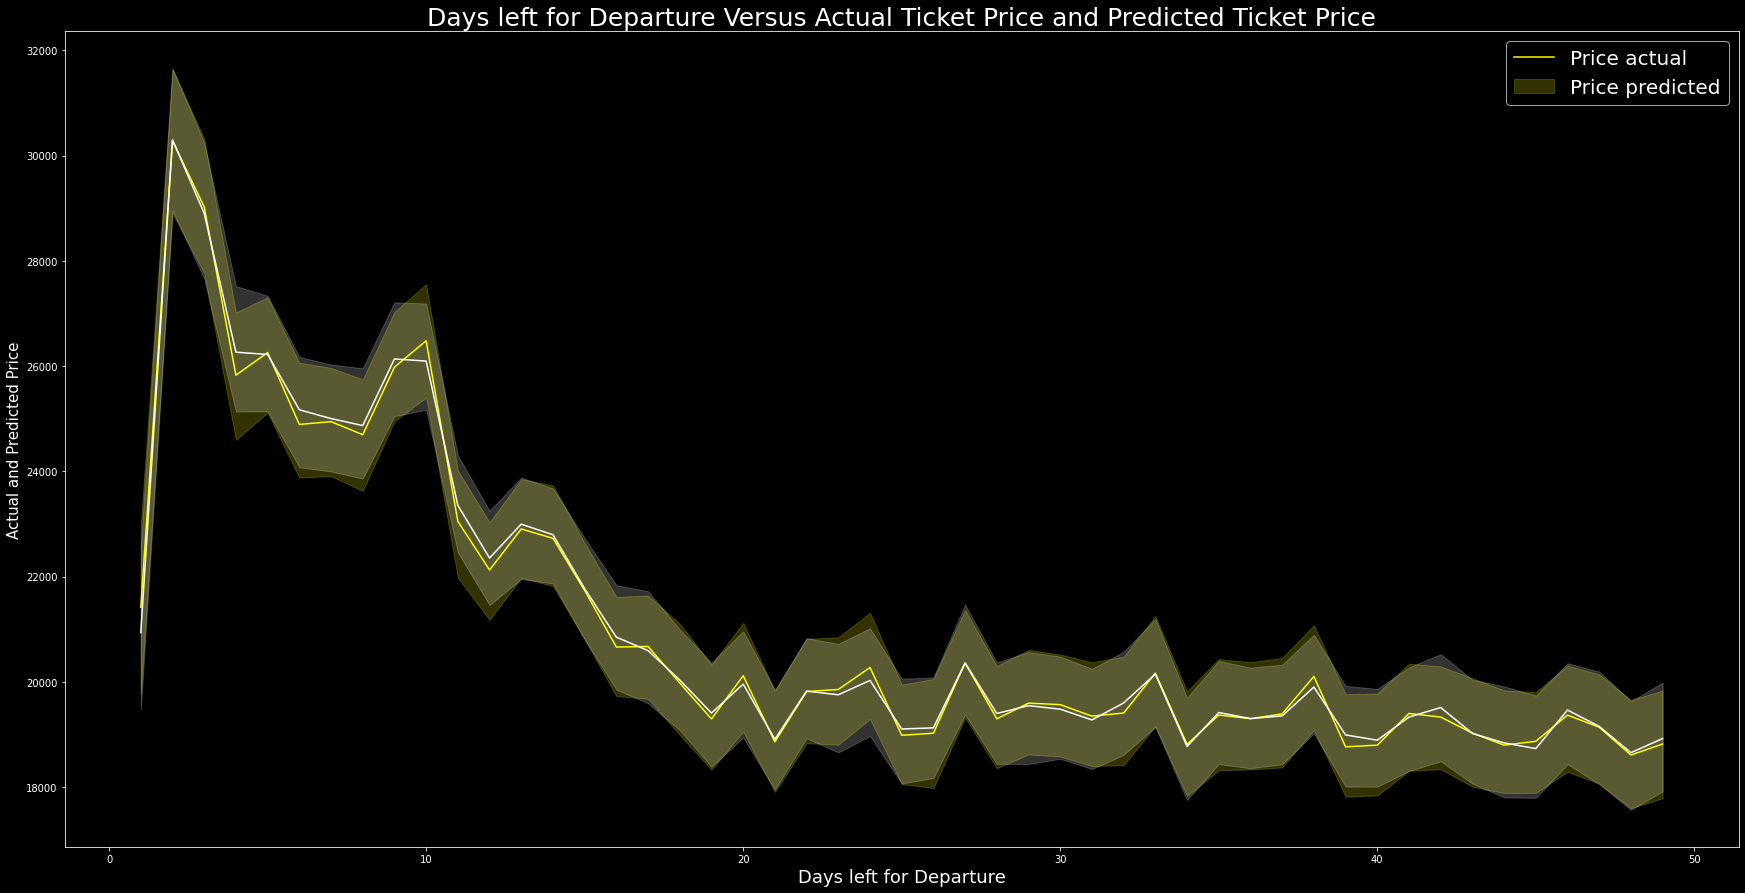

In [68]:
#Line plot od days left for Departure vs Actual and Predicted Ticked price.
plt.figure(figsize=(30,15))
sns.lineplot(data=result,x='days_left',y='Price_actual',color='yellow')
sns.lineplot(data=result,x='days_left',y='Price_pred',color='white')
plt.title("Days left for Departure Versus Actual Ticket Price and Predicted Ticket Price",fontsize=25)
plt.legend(labels=['Price actual','Price predicted'],fontsize=20)
plt.xlabel("Days left for Departure",fontsize=18)
plt.ylabel("Actual and Predicted Price",fontsize=15)
plt.show()

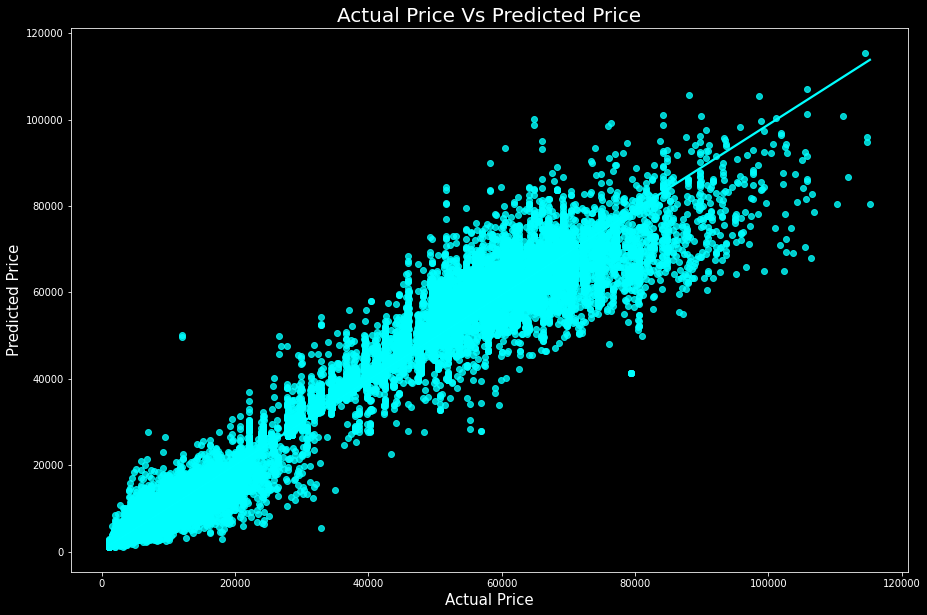

In [69]:
#Regression plot of Actual price VS predicted price
plt.figure(figsize=(15,10))
sns.regplot(x='Price_actual',y='Price_pred',data=result,color='cyan')
plt.title("Actual Price Vs Predicted Price",fontsize=20)
plt.xlabel("Actual Price",fontsize=15)
plt.ylabel('Predicted Price',fontsize=15)
plt.show()